## Advanced regression Assignment - Prediction of House Price

The solution is divided into the following sections: 
- Understanding and exploration the data
- Data cleaning
- Data preparation
- Model building and evaluation
- Observation and inference

In [119]:
# importing all the important
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
import os
import datetime

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [120]:
# Reading the data
df = pd.read_csv("train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [121]:
df.shape

(1460, 81)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [123]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [124]:
# Check for duplicates in the DataFrame
duplicates = df.duplicated(subset = 'Id')

print("Total duplicate rows based on Id:")
print(sum(duplicates))

Total duplicate rows based on Id:
0


In [125]:
# Checking for percentage nulls
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

## Check for Outliers

In [126]:
#Checking for outlier in the numerical columns
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
90%     117.200000  1232.000000  1602.200000  1680.000000   954.200000   
95%     396.200000  1468.000000  1753.000000  1831.250000  1141.050000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
90%        0.000000  2158.300000      1.000000      0.000000     2.000000   
95%        0.000000  2466.100000      1.000000      1.000000     2.000000   
99%      360.000000  3123.480000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%

In [127]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [128]:
# Find the columns with Null values
null = df.isnull().sum()/len(df)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

- According to the data dictionary, nulls in these columns indicate the absence of facility which may affect the price
- Hence, imputing the categorical variables with 'none'

In [129]:
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    df[i].fillna("none", inplace=True)

In [130]:
nulls = df.isnull().sum()/len(df)*100
nulls = nulls[nulls>0]
nulls.sort_values(inplace=True, ascending=False)
nulls

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [131]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [132]:
df.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [133]:
df.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [134]:
df.Electrical.describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [135]:
# LotFrontage - is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values

df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["Electrical"].dropna(inplace=True)

In [136]:
# Crosscheck the updated column
df['LotFrontage'].describe()

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [137]:
df['GarageYrBlt'].describe()

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [138]:
df['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [139]:
df['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [140]:
df.shape

(1460, 81)

### Some EDA on the cleaned data

- All numeric (float and int) variables in the dataset

In [141]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [142]:
# Dropping ID Column
df_numeric = df_numeric.drop(['Id'], axis=1)
df_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

#### Target variable 'sale Price' vs a few select columns

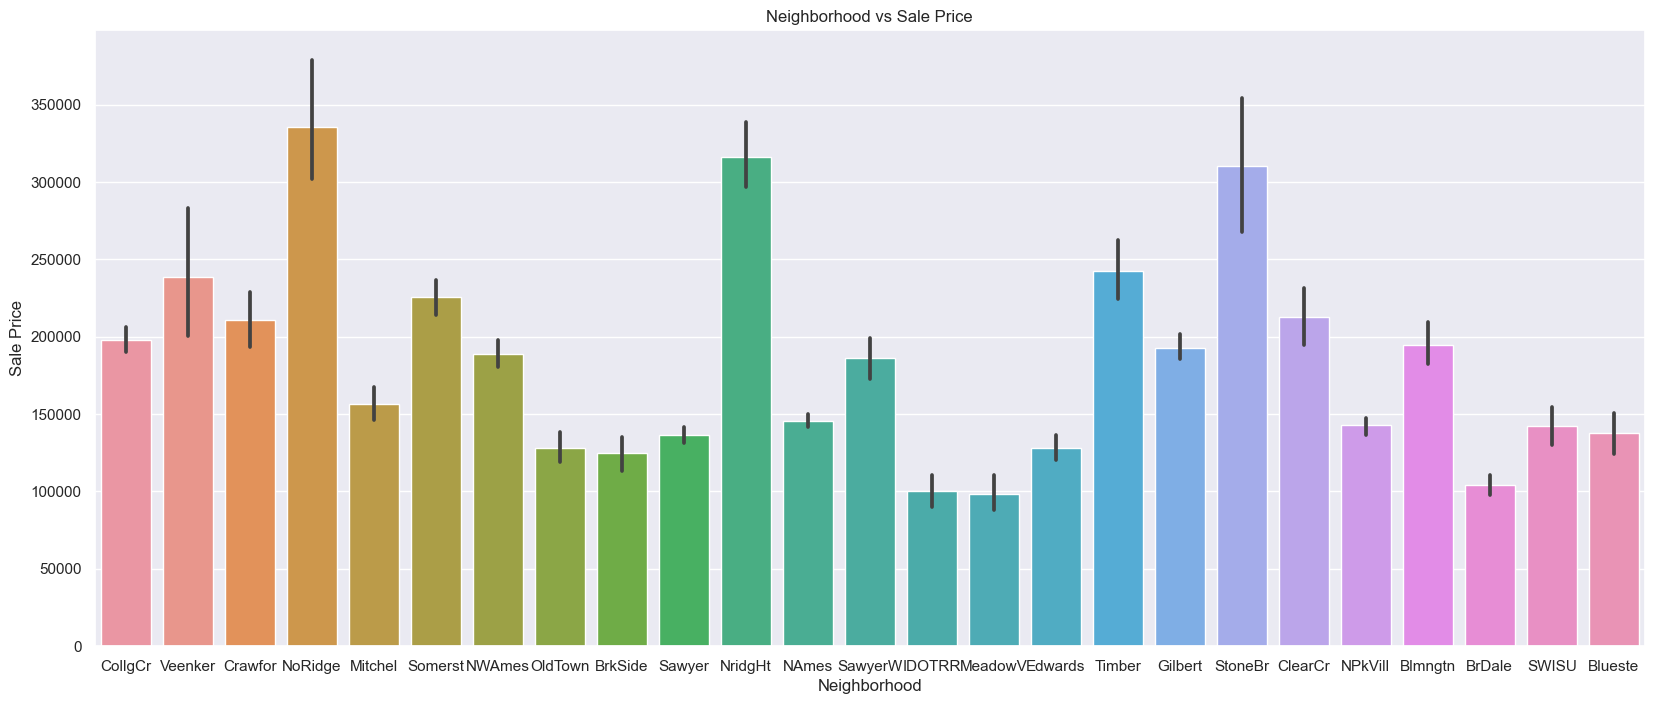

In [143]:
plt.figure(figsize=(20,8))
sns.barplot(x='Neighborhood', y='SalePrice', data=df)
plt.title('Neighborhood vs Sale Price')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.show()

- Properties in areas NoRidge, NridgHt and StoneBr are highly priced

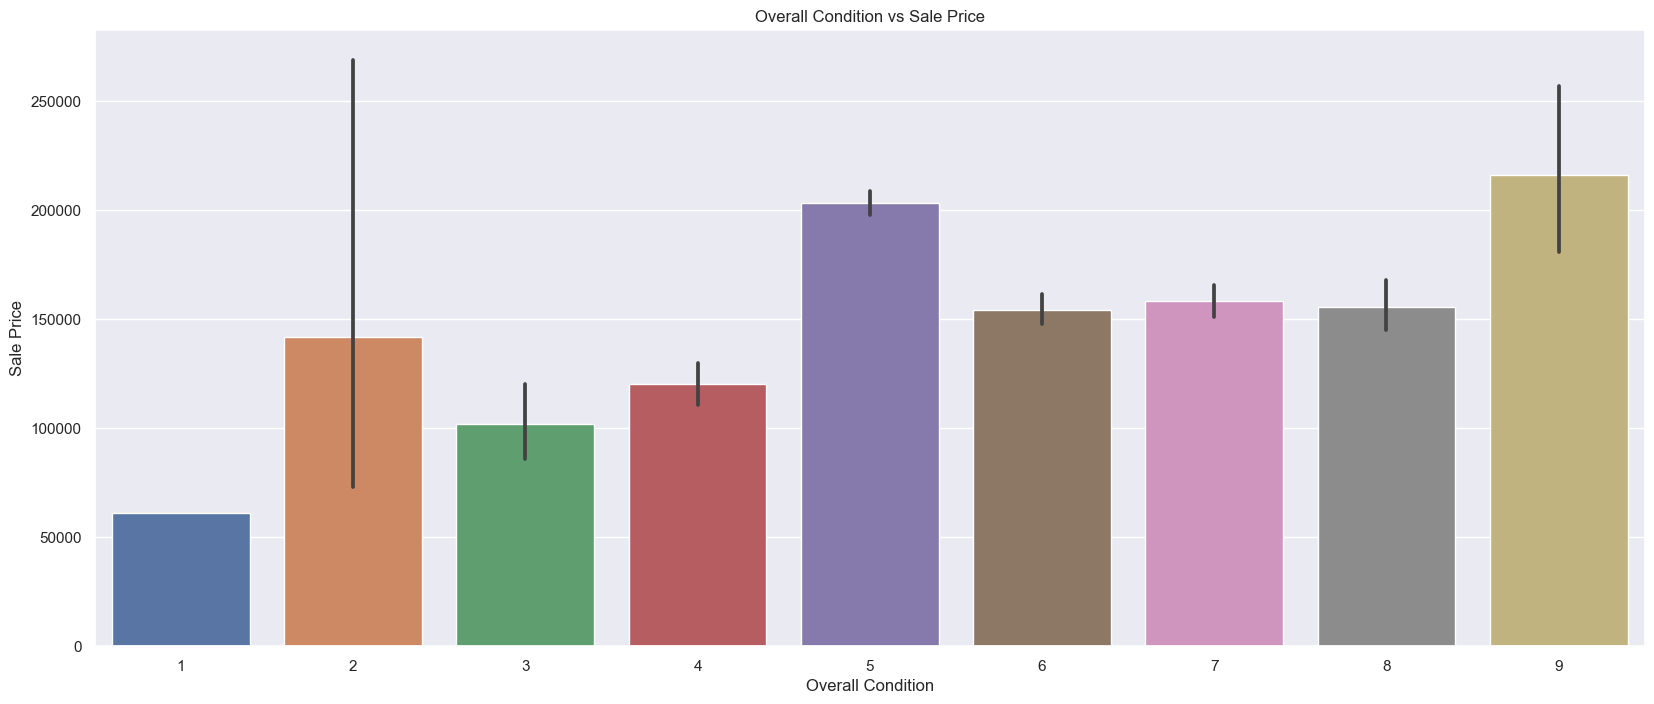

In [144]:
plt.figure(figsize=(20,8))
sns.barplot(x='OverallCond', y='SalePrice', data=df)
plt.title('Overall Condition vs Sale Price')
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price')
plt.show()

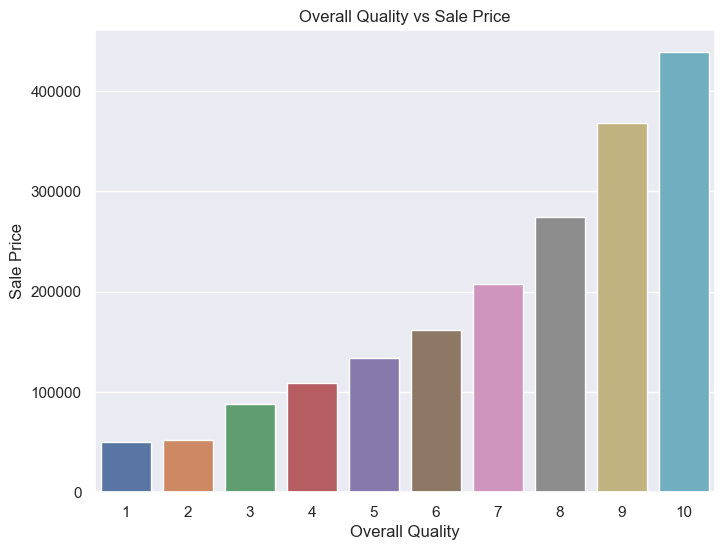

In [145]:
plt.figure(figsize=(8, 6))
sns.barplot(x='OverallQual', y='SalePrice', data=df, ci=None)
plt.title('Overall Quality vs Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

- Price increases with increase in quality. Increase in the overall quality has a direct positive effect on the sale price

<Axes: xlabel='SalePrice', ylabel='Density'>

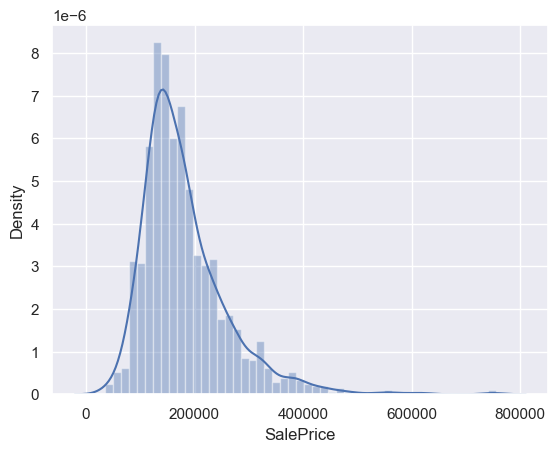

In [146]:
sns.distplot(df['SalePrice'])

In [147]:
df_raw = df.copy

- Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data

In [148]:
#Log Transformation
df['SalePrice']=np.log1p(df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

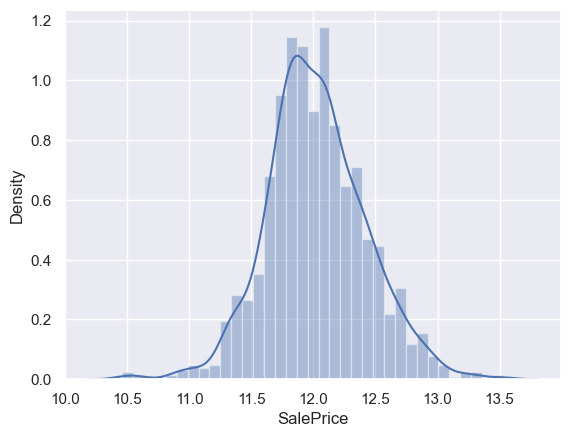

In [149]:
sns.distplot(df['SalePrice'])

In [150]:
# correlation matrix
cor = df_numeric.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.370367 -0.139781     0.032628    -0.059316   
LotFrontage     -0.370367     1.000000  0.335957     0.239546    -0.043595   
LotArea         -0.139781     0.335957  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.239546  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.043595 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.120999  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.084550  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.195830  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.232576  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.052237  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.119174 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.381038  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.434109  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.075686  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.031873  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.385190  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.107226  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333     0.006620  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.186561  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.054190  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.245232  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.005627 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.332619  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.249295  0.271364     0.396765    -0.023820   
GarageYrBlt      0.081396     0.062380 -0.025865     0.514231    -0.306276   
GarageCars      -0.040110     0.281393  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.339085  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088736  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.141734  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.008057 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.064654  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041063  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.174567  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.005332  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.007370  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.004756 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.349876  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.120999      0.084550    0.195830    0.232576    0.052237   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

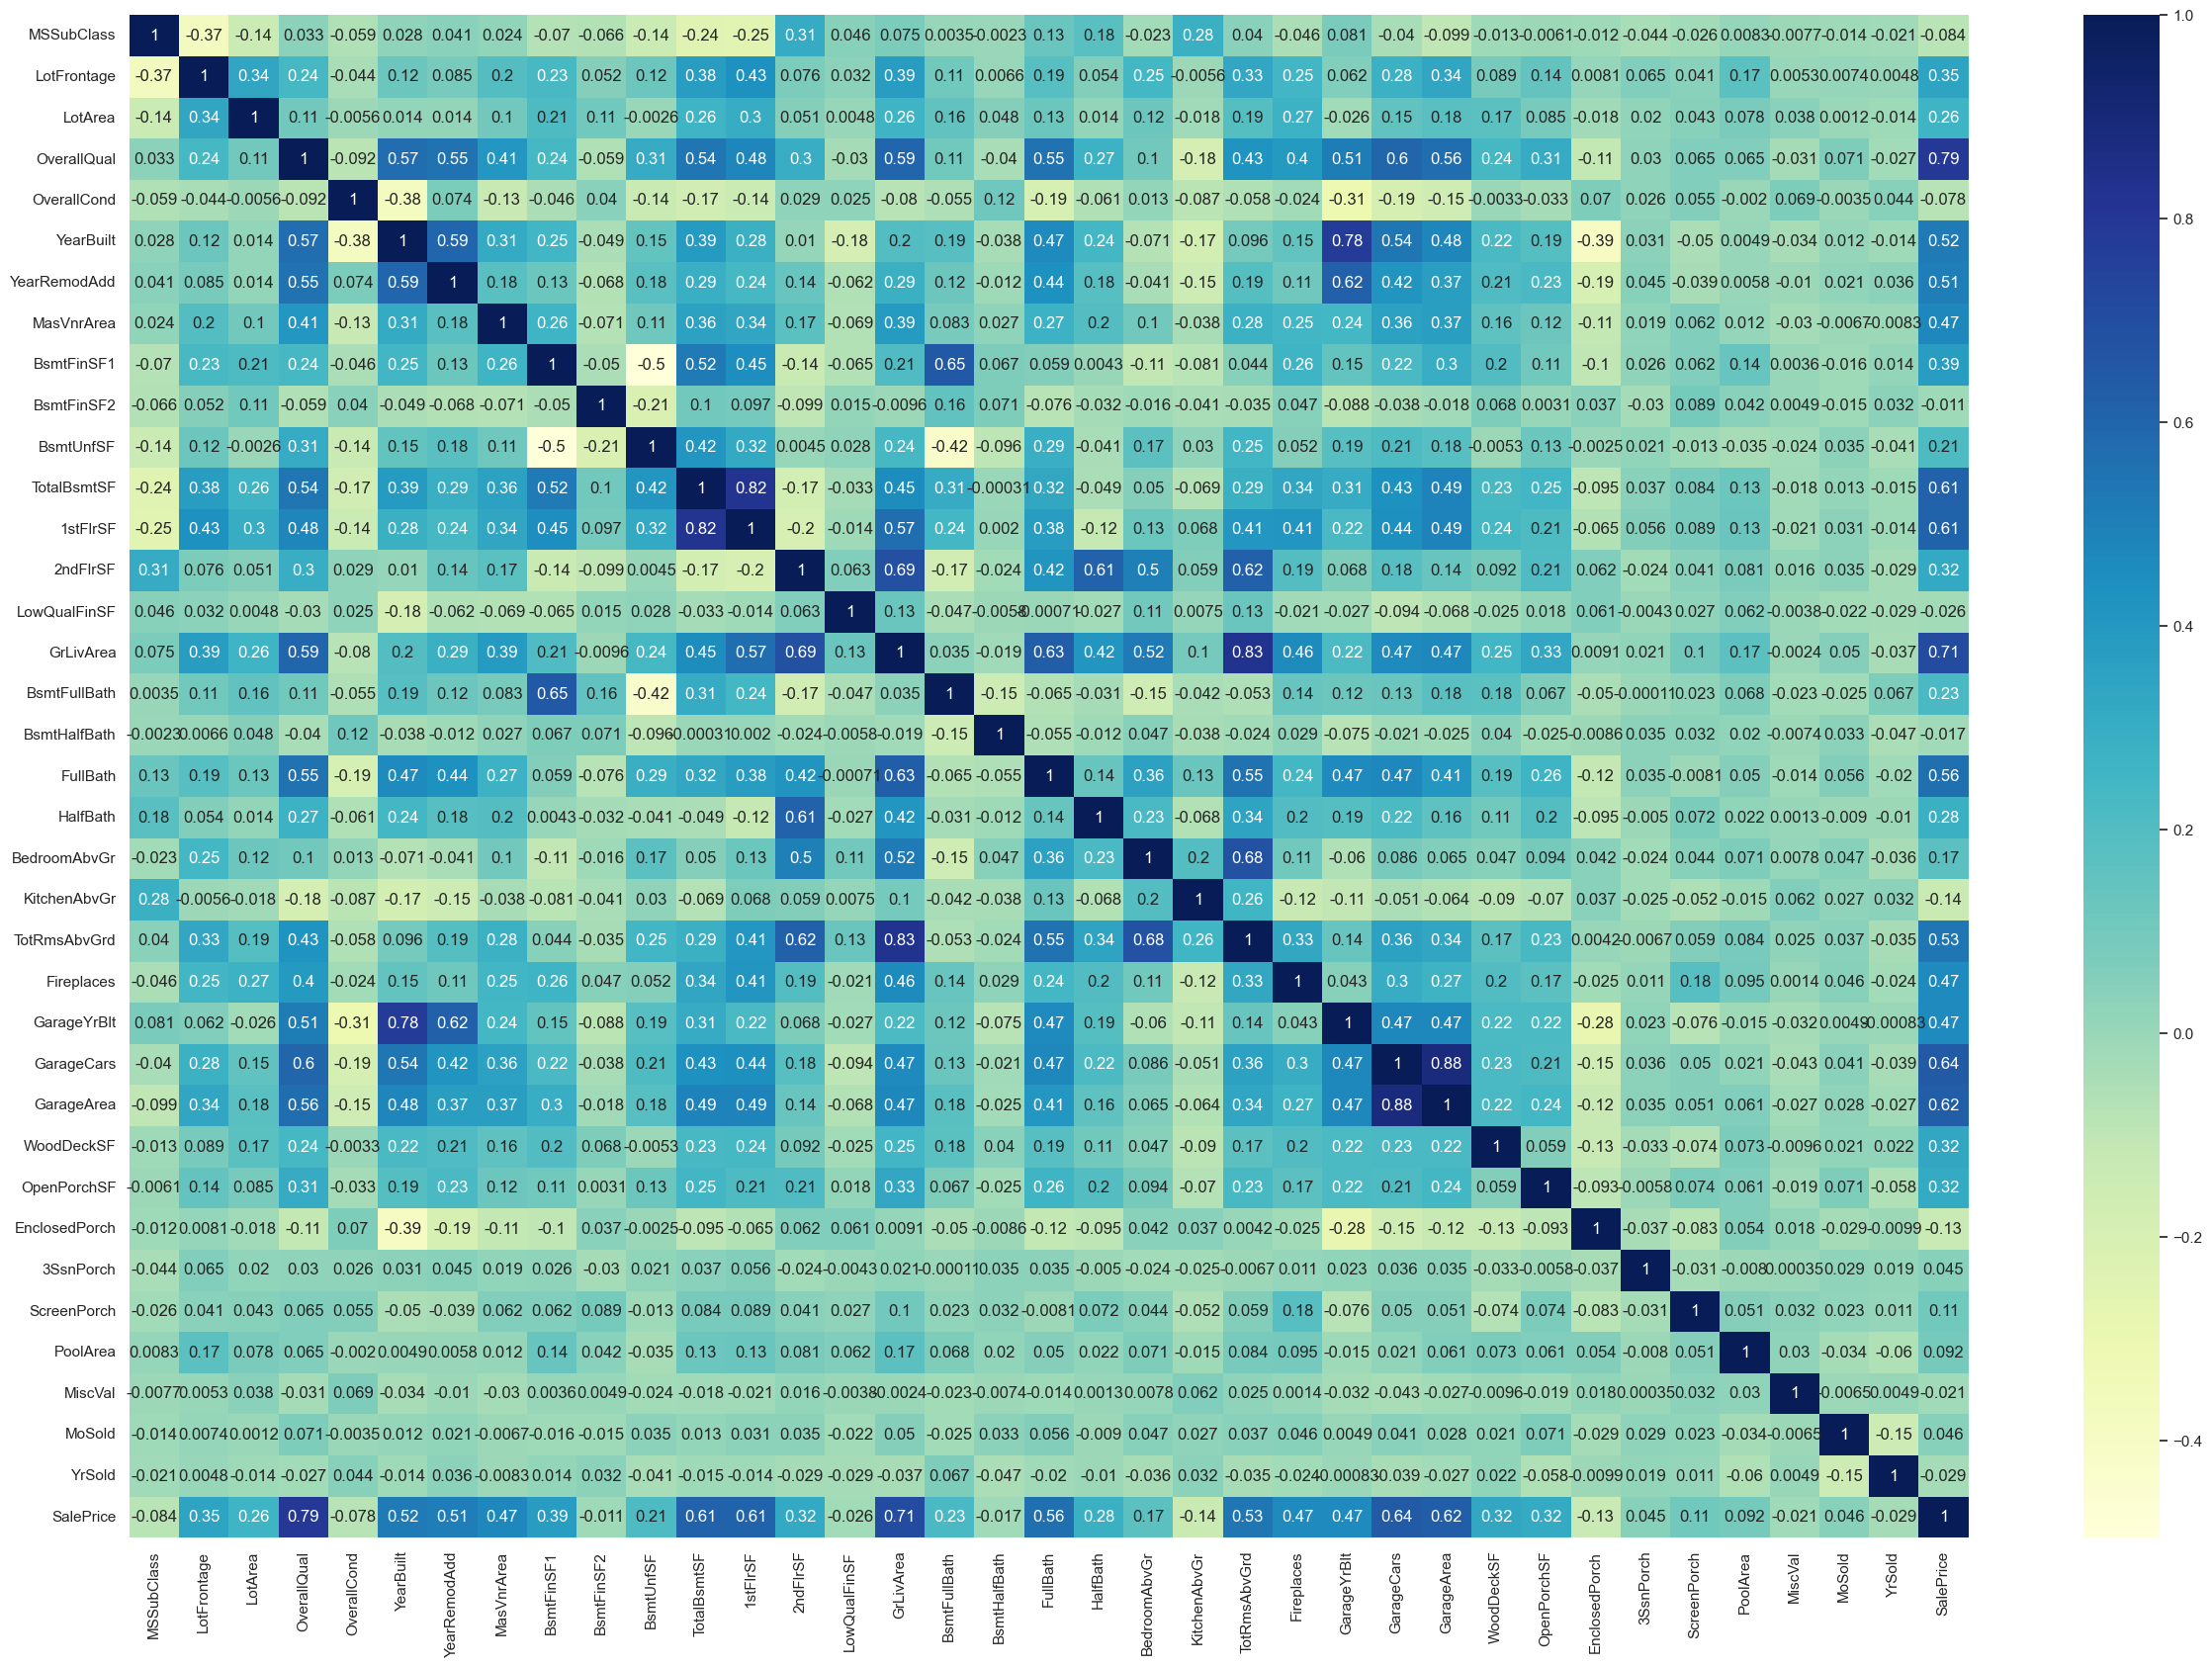

In [151]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

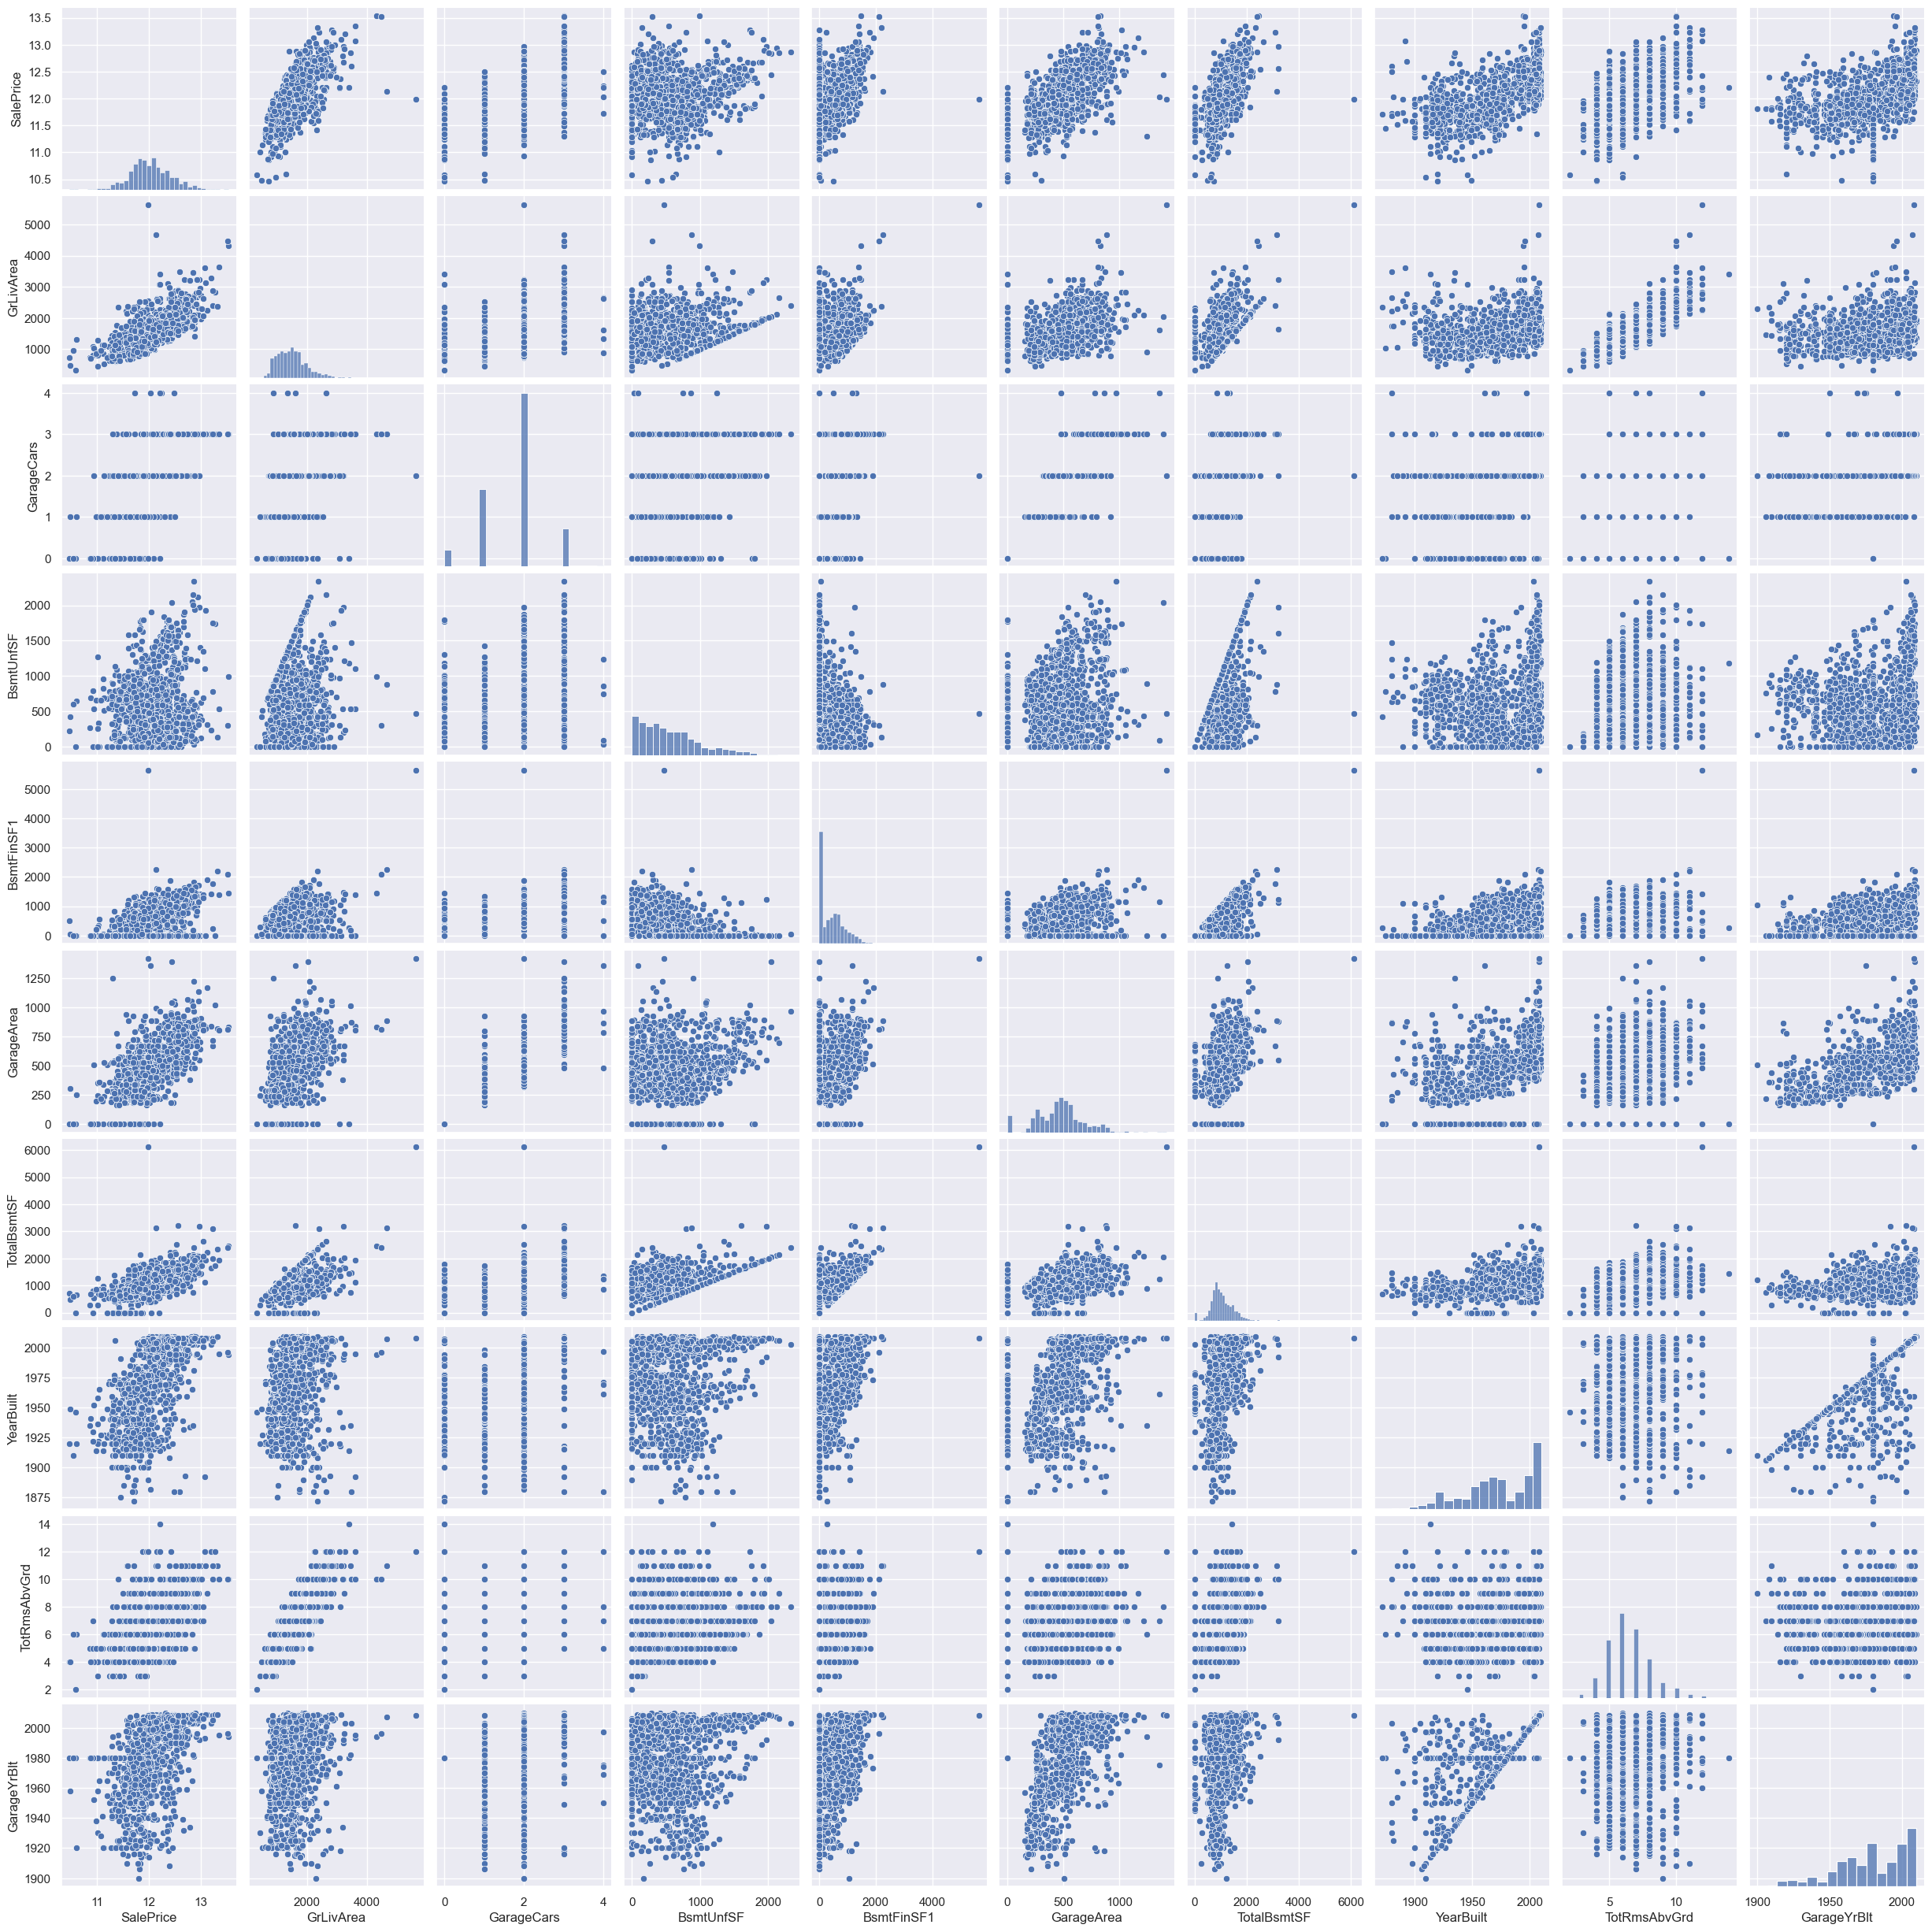

In [152]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

Below fields are highly correlated, 
- TotRmsAbvGrd, GrLivArea
- 1stFlrSF, TotBsmtSF
- TotRmsAbvGrd, BedroomAbvGr
- GarageArea , GarageCars
- YearRemodAdd, YearBuilt
- Yearblt and GarageYrBlt

We can drop TotRmsAbvGrd,1stFlrSF,GarageArea,GarageYrBlt

In [153]:
df.drop(columns=['GarageCars','BsmtUnfSF','TotRmsAbvGrd','GarageYrBlt'],inplace=True)

In [154]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ  

In [155]:
#Numeric columns
df.select_dtypes(exclude=['object'])

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0          2003          2003       196.0         706           0   
1          1976          1976         0.0         978           0   
2          2001          2002       162.0         486           0   
3          1915          1970         0.0         216           0   
4          2000          2000       350.0         655           0   
...         ...           ...         ...         ...         ...   
1455       1999          2000         0.0           0           0   
1456       1978          1988       119.0         790         163   
1457       1941          2006         0.0         275           0   
1458       1950          1996         0.0          49        1029   
1459       1965          1965         0.0         830         290   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0              0         548           0           61              0   
1              1         460         298            0              0   
2              1         608           0           42              0   
3              1         642           0           35            272   
4              1         836         192           84              0   
...          ...         ...         ...          ...   

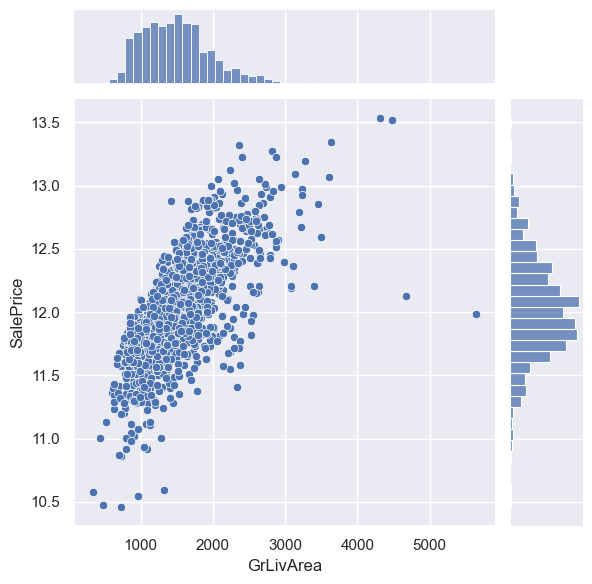

In [156]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

In [157]:
# Removing some outliers on lower right side of 'GrLivArea'
df = remove_outliers(df,'GrLivArea')

In [158]:
df.shape

(1429, 77)

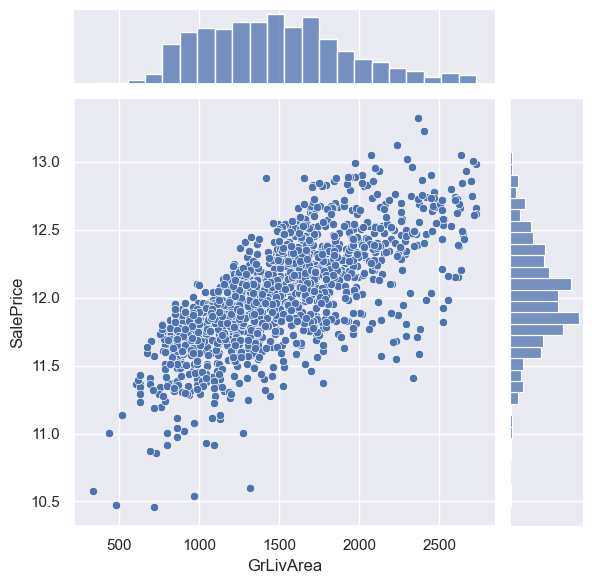

In [159]:
# Again plotting GeLivArea vs SalePrice
sns.jointplot(x = df['GrLivArea'], y = df['SalePrice'])
plt.show()

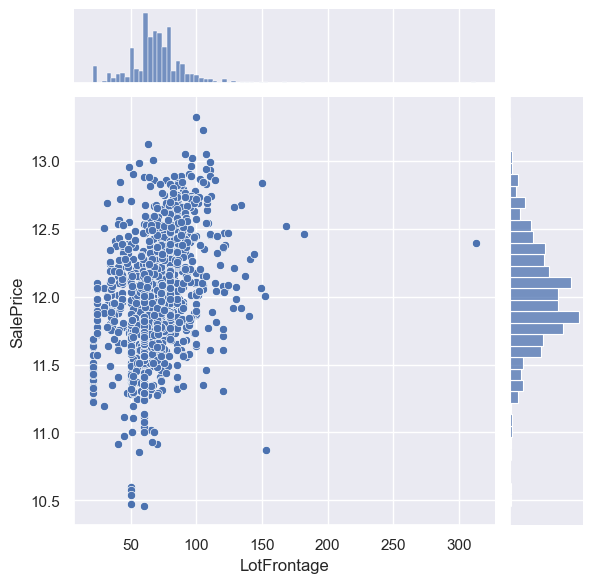

In [160]:
# Lot frontage vs SalePrice 
sns.jointplot(x = df['LotFrontage'], y = df['SalePrice'])
plt.show()

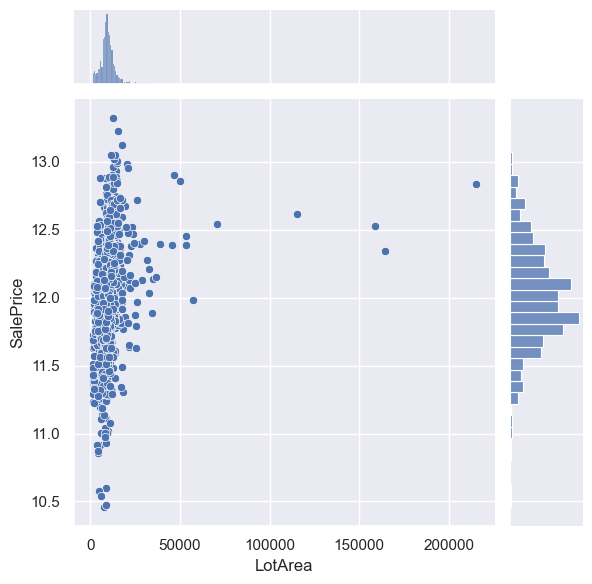

In [161]:
# Plotting LotArea vs SalePrice
sns.jointplot(x = df['LotArea'], y = df['SalePrice'])
plt.show()

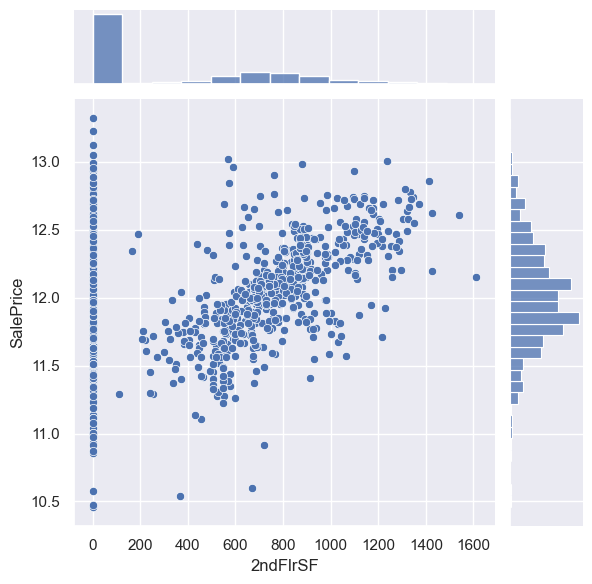

In [162]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = df['2ndFlrSF'], y = df['SalePrice'])
plt.show()

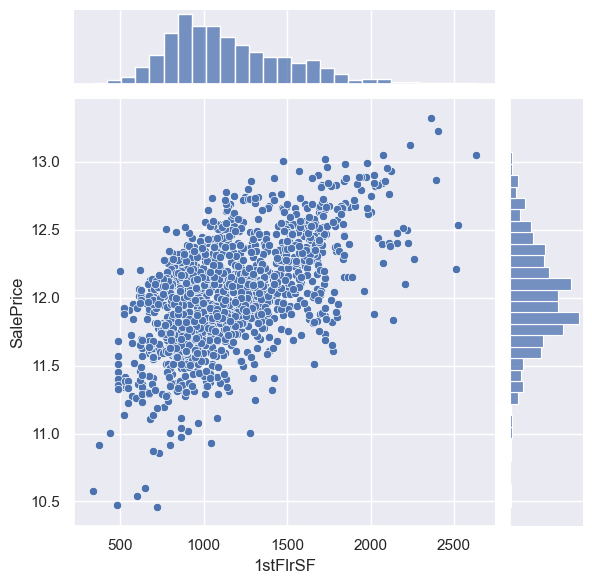

In [163]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = df['1stFlrSF'], y = df['SalePrice'])
plt.show()

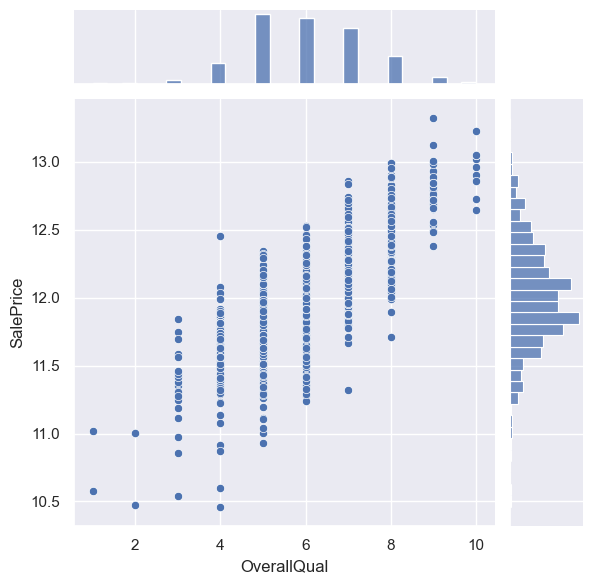

In [164]:
# OverallQual vs SalePrice
sns.jointplot(x = df['OverallQual'], y = df['SalePrice'])
plt.show()

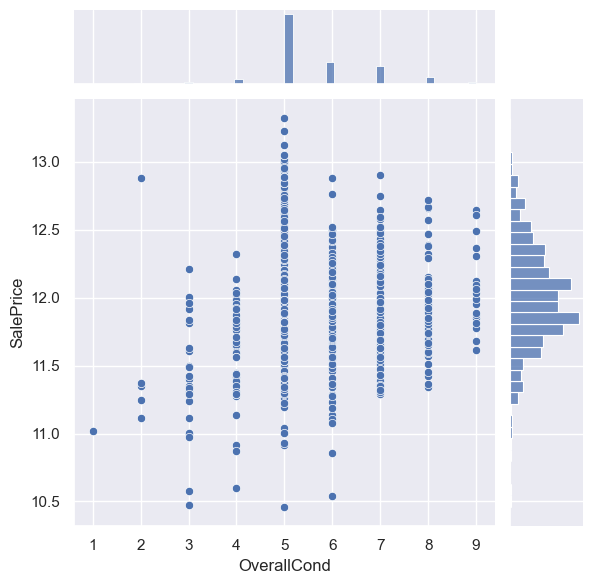

In [165]:
# OverallCond vs SalePrice
sns.jointplot(x=df['OverallCond'], y = df['SalePrice'])
plt.show()

- Ground or First level houses i.e. '0' second floor Sq.Ft has also a steady increase

### We can derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'

In [166]:
# PropAge -  Property Age from yearsold - yearbuilt
df['PropAge'] = (df['YrSold'] - df['YearBuilt'])
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ  

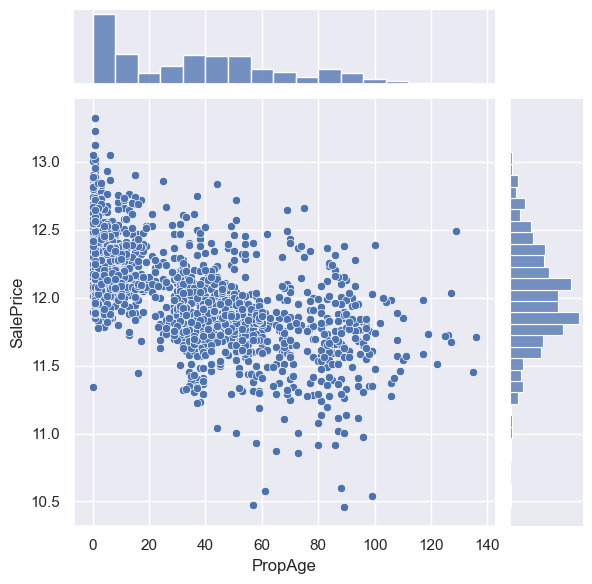

In [167]:
# PropAge vs SalePrice
sns.jointplot(x = df['PropAge'], y = df['SalePrice'])
plt.show()

- Sale Price decreases and age of the property increases
###  Removing columns which are no longer be required

In [168]:
df.drop(columns=['MoSold','YrSold','YearBuilt'],inplace=True)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearRemodAdd  \
0       Norm     1Fam     2Story            7            5          2003   
1       Norm     1Fam     1Story            6            8          1976   
2       Norm     1Fam     2Story            7            5          2002   
3       Norm     1Fam     2Story            7            5          1970   
4       Norm     1Fam     2Story            8            5          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating HeatingQC  \
0         706          Unf           0          856    GasA        Ex   
1         978          Unf           0         1262    GasA        Ex   
2         486          Unf           0          920    GasA        Ex   
3         216          Unf           0          756    GasA        Gd   
4         655          Unf           0         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual Functional  Fireplaces FireplaceQu GarageType GarageFinish  \
0          Gd        Typ           0        none     Attchd          RFn   
1          TA        Typ           1          TA     Attchd          RFn   
2          Gd        Typ           1          TA     Attchd          RFn   
3          Gd        Typ           1          Gd     Detchd          Unf   
4          Gd        Typ   

In [169]:
df.Street.value_counts()

Pave    1423
Grvl       6
Name: Street, dtype: int64

In [170]:
df.Utilities.value_counts()

AllPub    1428
NoSeWa       1
Name: Utilities, dtype: int64

- We can also drop columns that show very low variance and thus not required for predictions

In [171]:
df.drop(columns=['Street','Utilities'],inplace=True)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0   1          60       RL         65.0     8450  none      Reg         Lvl   
1   2          20       RL         80.0     9600  none      Reg         Lvl   
2   3          60       RL         68.0    11250  none      IR1         Lvl   
3   4          70       RL         60.0     9550  none      IR1         Lvl   
4   5          60       RL         84.0    14260  none      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0            7            5          2003     Gable  CompShg     VinylSd   
1            6            8          1976     Gable  CompShg     MetalSd   
2            7            5          2002     Gable  CompShg     VinylSd   
3            7            5          1970     Gable  CompShg     Wd Sdng   
4            8            5          2000     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu  \
0             3             1          Gd        Typ           0        none   
1             3             1          TA        Typ           1          TA   
2             3             1          Gd        Typ           1          TA   
3             3             1          Gd        Typ           1          Gd   
4             4             1          Gd        Typ           1          TA   

  GarageType GarageFinish  GarageArea GarageQual GarageCond PavedDrive  \
0     Attchd          RFn         548         TA         TA          Y   
1     Attchd          RFn         460         TA         TA          Y   
2    

### Checking variance in numerical columns

In [172]:
df_num= df.select_dtypes(include=['float64', 'int64'])
df_num

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  \
0             2003       196.0         706           0          856       856   
1             1976         0.0         978           0         1262      1262   
2             2002       162.0         486           0          920       920   
3             1970         0.0         216           0          756       961   
4             2000       350.0         655           0         1145      1145   
...            ...         ...         ...         ...          ...       ...   
1455          2000         0.0           0           0          953       953   
1456          1988       119.0         790         163         1542      2073   
1457          2006         0.0         275           0         1152      1188   
1458          1996         0.0          49        1029         1078      1078   
1459          1965         0.0         830         290         1256      1256   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0          854             0       1710             1             0         2   
1            0             0       1262             0             1         2   
2          866             0       1786             1             0         2   
3          756             0       1717             1             0         1   
4         1053             0       2198             1             0         2   
...        ...           ...        ...           ...           ...       ...   
1455       694             0       1647             0             0         2   
1456         0             0       2073             1             0         2   
1457      1152             0       2340             0             0         2   
1458         0             0       1078             1             0         1   
1459         0             0       1256             1             0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  \
0            1             3             1           0         548   
1            0             3             1           1         460   
2            1             3             1           1         608   
3            0             3             1           1         642   
4            1             4             1           1         836   
...        ...           ...           ...         ...         ...   
1455         1             3             1           1         460   
1456         0             3             1           2         500   
1457         0             4             1           2         252   
1458         0             2             1           0         240   
1459         1             3             1           0         276   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0              0           61              0          0            0   
1            298            0              0          0            0   
2              0           42              0          0            0   
3              0           35            272

In [173]:
for i in df_num:
    print(df[i].value_counts())

1       1
956     1
977     1
976     1
975     1
       ..
482     1
481     1
480     1
479     1
1460    1
Name: Id, Length: 1429, dtype: int64
20     534
60     283
50     139
120     87
30      69
160     63
70      59
80      57
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: MSSubClass, dtype: int64
60.0     150
80.0     110
70.0      94
65.0      74
73.0      70
        ... 
33.0       1
150.0      1
38.0       1
111.0      1
46.0       1
Name: LotFrontage, Length: 112, dtype: int64
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
10637     1
16033     1
11846     1
2500      1
9717      1
Name: LotArea, Length: 1047, dtype: int64
5     396
6     371
7     314
8     157
4     116
9      40
3      20
10     10
2       3
1       2
Name: OverallQual, dtype: int64
5    804
6    248
7    201
8     72
4     56
3     24
9     18
2      5
1      1
Name: OverallCond, dtype: int64
1950    177
2006     95
2007     74
2005     73
20

In [174]:
df.drop(columns=['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ],inplace=True)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd  \
0            7            5          2003     Gable     VinylSd     VinylSd   
1            6            8          1976     Gable     MetalSd     MetalSd   
2            7            5          2002     Gable     VinylSd     VinylSd   
3            7            5          1970     Gable     Wd Sdng     Wd Shng   
4            8            5          2000     Gable     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF  \
0           No          GLQ         706          Unf           0          856   
1           Gd          ALQ         978          Unf           0         1262   
2           Mn          GLQ         486          Unf           0          920   
3           No          ALQ         216          Unf           0          756   
4           Av          GLQ         655          Unf           0         1145   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  Fireplaces FireplaceQu GarageType GarageFinish  \
0             1          Gd           0        none     Attchd          RFn   
1             1          TA           1          TA     Attchd          RFn   
2             1          Gd           1          TA     Attchd          RFn   
3             1          Gd           1          Gd     Detchd          Unf   
4             1          Gd           1          TA     Attchd          RFn   

   GarageArea GarageQual PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0         548         TA          Y           0           61              0   
1         460         TA          Y         298            0              0   
2         608         TA          Y           0           42              0   
3         642         TA          Y  

- These Columns were having high null values, some of which were imputed. After imputing, it was found that there was very little variance in the data. So, the columns were dropped..

In [175]:
df.shape

(1429, 64)

## 3. Data Preparation 

In [176]:
# Drop 'Id' from Dataframe

df = df.drop(['Id'], axis=1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
0       Gtl      CollgCr       Norm     1Fam     2Story            7   
1       Gtl      Veenker      Feedr     1Fam     1Story            6   
2       Gtl      CollgCr       Norm     1Fam     2Story            7   
3       Gtl      Crawfor       Norm     1Fam     2Story            7   
4       Gtl      NoRidge       Norm     1Fam     2Story            8   

   OverallCond  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  \
0            5          2003     Gable     VinylSd     VinylSd    BrkFace   
1            8          1976     Gable     MetalSd     MetalSd       None   
2            5          2002     Gable     VinylSd     VinylSd    BrkFace   
3            5          1970     Gable     Wd Sdng     Wd Shng       None   
4            5          2000     Gable     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF HeatingQC  \
0          GLQ         706          Unf           0          856        Ex   
1          ALQ         978          Unf           0         1262        Ex   
2          GLQ         486          Unf           0          920        Ex   
3          ALQ         216          Unf           0          756        Gd   
4          GLQ         655          Unf           0         1145        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  Fireplaces FireplaceQu GarageType GarageFinish  GarageArea  \
0          Gd           0        none     Attchd          RFn         548   
1          TA           1          TA     Attchd          RFn         460   
2          Gd           1          TA     Attchd          RFn         608   
3          Gd           1          Gd     Detchd          Unf         642   
4          Gd           1          TA     Attchd          RFn         836   

  GarageQual PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   
2         TA          Y           0           42              0        

In [177]:
#type of each feature in data: int, float, object
types = df.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categoric_type = types[types == object]

In [178]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      27
float64     3
Name: 0, dtype: int64

In [179]:
numeric_cols = list(numeric_type.index)
print(numeric_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropAge']


In [180]:
categorical_cols = list(categoric_type.index)
print(categorical_cols)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


### Creating Dummy columns to convert categorical into numerical values

In [181]:
df = pd.get_dummies(df, drop_first=True )
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
0          60         65.0     8450            7            5          2003   
1          20         80.0     9600            6            8          1976   
2          60         68.0    11250            7            5          2002   
3          70         60.0     9550            7            5          1970   
4          60         84.0    14260            8            5          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0       196.0         706           0          856       856       854   
1         0.0         978           0         1262      1262         0   
2       162.0         486           0          920       920       866   
3         0.0         216           0          756       961       756   
4       350.0         655           0         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
0             3             1           0         548           0   
1             3             1           1         460         298   
2             3             1           1         608           0   
3             3             1           1         642           0   
4             4             1           1         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  \
0           61              0          0            0         0  12.247699   
1            0              0          0            0         0  12.109016   
2           42              0          0            0         0  12.317171   
3           35            272          0            0         0  11.849405   
4           84              0          0            0         0  12.429220   

   PropAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0        5            0            0            1            0             0   
1       31            0            0            1            0             0   
2        7            0            0            1            0             0   
3       91            0            0            1            0             0   
4        8            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0          

In [182]:
X = df.drop(['SalePrice'], axis=1)

X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
0          60         65.0     8450            7            5          2003   
1          20         80.0     9600            6            8          1976   
2          60         68.0    11250            7            5          2002   
3          70         60.0     9550            7            5          1970   
4          60         84.0    14260            8            5          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0       196.0         706           0          856       856       854   
1         0.0         978           0         1262      1262         0   
2       162.0         486           0          920       920       866   
3         0.0         216           0          756       961       756   
4       350.0         655           0         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
0             3             1           0         548           0   
1             3             1           1         460         298   
2             3             1           1         608           0   
3             3             1           1         642           0   
4             4             1           1         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PropAge  \
0           61              0          0            0         0        5   
1            0              0          0            0         0       31   
2           42              0          0            0         0        7   
3           35            272          0            0         0       91   
4           84              0          0            0         0        8   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborho

In [183]:
# Putting response variable to y
y = df['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [184]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [185]:
scaler = StandardScaler()
numeric_cols.remove('SalePrice')
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [186]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
127    -0.274878    -0.708617 -0.584255    -0.767909     1.287463   
687     2.457272     0.185308 -0.514223     0.723176    -0.523315   
1315    0.081489     0.740992  0.068885    -0.022366    -0.523315   
149    -0.156089    -0.853578 -0.403364    -0.767909    -1.428703   
1195    0.081489    -0.901898 -0.228627    -0.022366    -0.523315   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  \
127      -1.662930   -0.560276   -0.749445   -0.293863    -0.876531 -0.855099   
687       0.946876   -0.560276   -0.457086   -0.293863    -1.169786 -1.670933   
1315     -0.744665   -0.560276    0.163286    1.426345    -0.197925 -0.143714   
149      -1.662930   -0.560276   -1.025166   -0.293863    -0.333646 -0.697013   
1195      0.995206   -0.560276   -1.025166   -0.293863    -0.740810 -1.171270   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
127  -0.787196     -0.110932  -1.422075     -0.824529     -0.241838 -1.019137   
687   0.559115     -0.110932  -0.830295     -0.824529     -0.241838  0.850839   
1315  1.705067     -0.110932   1.450995     -0.824529     -0.241838  0.850839   
149   0.307445     -0.110932  -0.283689     -0.824529     -0.241838 -1.019137   
1195  0.991596     -0.110932  -0.030714     -0.824529     -0.241838  0.850839   

      HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  \
127  -0.738377      0.223630     -0.215318    0.627637   -2.226044   
687   1.257237     -1.054254     -0.215318   -0.937542    0.055386   
1315  1.257237      1.501513     -0.215318    2.192816    0.511673   
149  -0.738377      0.223630     -0.215318   -0.937542   -1.085329   
1195  1.257237      0.223630     -0.215318   -0.937542   -0.324852   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
127    -0.760517    -0.708874      -0.371515  -0.108022    -0.266146   
687    -0.760517     0.241020      -0.371515  -0.108022    -0.266146   
1315    1.520846    -0.708874      -0.371515  -0.108022    -0.266146   
149     0.869028     1.095923      -0.371515  -0.108022    -0.266146   
1195    0.054256    -0.328916      -0.371515  -0.108022    -0.266146   

      PoolArea   PropAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
127  -0.054574  1.317224            0            0            0            1   
687  -0.054574 -1.123423            1            0            0            0   
1315 -0.054574  0.063919            0            0            1            0   
149  -0.054574  1.086352            0            0            0            1   
1195 -0.054574 -1.123423            0            0            1            0   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
127              0             0             0                0   
687              1             0             0                0   
1315             0             0             1                0   
149              0             0             1                0   
1195             0             0             0                0   

      LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
127                 0                0                  0              0   
687                 0                1                  0              1   
1315                0                1                  0              0   
149                 0                1                  0              0   
1195                0                1                  0              0   

      LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
127               0                 1              0              0   
687               0                 0              0              0   
1315              0                 1              0              0   
149               0                 1              0              0   
1195              0                 1              0              0

In [187]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
57      0.081489     0.934273  0.124559     0.723176    -0.523315   
1143   -0.868824     0.064508 -0.133786    -0.767909    -2.334092   
377     0.081489     1.562437  0.075527     1.468719    -0.523315   
909     0.081489     3.833491  0.216762    -0.022366    -0.523315   
866    -0.868824    -0.128774  0.027960     1.468719    -0.523315   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  \
57        0.946876   -0.560276   -1.025166   -0.293863    -0.420896 -0.798640   
1143     -1.227962   -0.560276   -0.340618   -0.293863    -0.067051 -0.386488   
377       0.995206   -0.560276   -1.025166   -0.293863     1.324091  1.233889   
909       0.995206   -0.560276   -1.025166   -0.293863    -0.706880 -1.131748   
866       1.091865    1.188770   -1.025166   -0.293863     1.464660  1.420204   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
57    1.314124     -0.110932   0.565584     -0.824529     -0.241838  0.850839   
1143 -0.787196     -0.110932  -1.047130     -0.824529     -0.241838 -1.019137   
377   1.377652     -0.110932   2.250576     -0.824529     -0.241838  2.720815   
909   1.025803     -0.110932   0.032530     -0.824529     -0.241838  0.850839   
866  -0.787196     -0.110932   0.398440     -0.824529     -0.241838  0.850839   

      HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  \
57    1.257237      0.223630     -0.215318   -0.937542    0.459390   
1143 -0.738377      0.223630     -0.215318   -0.937542   -2.226044   
377  -0.738377      1.501513     -0.215318    0.627637    0.673274   
909   1.257237      0.223630     -0.215318    0.627637   -0.372382   
866  -0.738377      0.223630     -0.215318    0.627637    1.909049   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
57     -0.760517     0.399335      -0.371515  -0.108022    -0.266146   
1143   -0.760517    -0.328916      -0.371515  -0.108022    -0.266146   
377     0.534971     2.679078      -0.371515  -0.108022    -0.266146   
909    -0.467199    -0.328916      -0.371515  -0.108022    -0.266146   
866     0.803846     0.557651      -0.371515  -0.108022    -0.266146   

      PoolArea   PropAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
57   -0.054574 -1.156405            0            0            1            0   
1143 -0.054574  0.393736            0            0            1            0   
377  -0.054574 -1.123423            1            0            0            0   
909  -0.054574 -1.090441            0            0            1            0   
866  -0.054574 -1.189387            0            0            1            0   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
57               0             0             0                0   
1143             0             0             1                0   
377              0             0             0                0   
909              1             0             0                0   
866              0             0             0                1   

      LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
57                  0                1                  0              0   
1143                0                1                  0              0   
377                 0                1                  0              0   
909                 0                1                  0              0   
866                 0                0                  0              0   

      LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
57                0                 0              0              0   
1143              0                 1              0              0   
377               0                 0              0              0   
909               0                 1              0              0   
866               0                 1              0              0

## 3. Model Building and Evaluation

### Ridge regression

In [188]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [189]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.003927      0.006051         0.010212        0.008488      0.0001   
1       0.007550      0.006408         0.005172        0.005830       0.001   
2       0.010085      0.000016         0.009645        0.000809        0.01   
3       0.010687      0.000827         0.003417        0.003456        0.05   
4       0.009665      0.001022         0.002427        0.002967         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.083534          -0.092512          -0.096094   
1   {'alpha': 0.001}          -0.083483          -0.092489          -0.096068   
2    {'alpha': 0.01}          -0.082999          -0.092280          -0.095809   
3    {'alpha': 0.05}          -0.081498          -0.091626          -0.094944   
4     {'alpha': 0.1}          -0.080216          -0.091206          -0.094087   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.082977          -0.090085        -0.089041        0.005099   
1          -0.082962          -0.090061        -0.089013        0.005102   
2          -0.082815          -0.089842        -0.088749        0.005134   
3          -0.082211          -0.089187        -0.087893        0.005263   
4          -0.081549          -0.088692        -0.087150        0.005411   

   rank_test_score  split0_train_score  split1_train_score  \
0               26           -0.063677           -0.061970   
1               25           -0.063680           -0.061971   
2               24           -0.063717           -0.061990   
3               23           -0.063863           -0.062089   
4               22           -0.064029           -0.062205   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.060737           -0.063139           -0.061420   
1           -0.060738           -0.063139           -0.061417   
2           -0.060749           -0.063141           -0.061389   
3           -0.060796           -0.063175           -0.061340   
4           -0.060895           -0.063253           -0.061311   

   mean_train_score  std_train_score  
0         -0.062188         0.001083  
1         -0.062189         0.001084  
2         -0.062197         0.001095  
3         -0.062253         0.001133  
4         -0.062339         0.001171

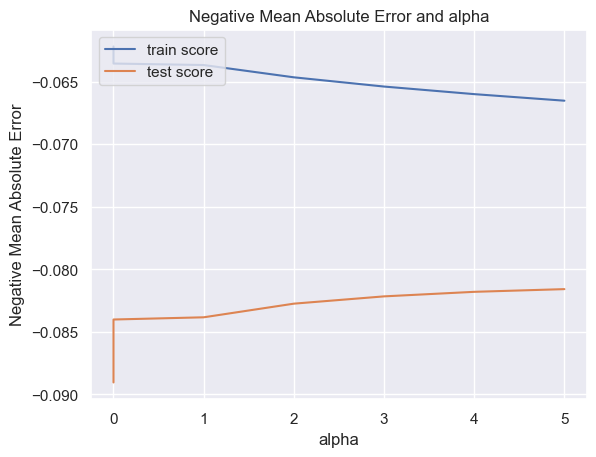

In [190]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

- The Negative Mean Absolute Error stabilises at alpha = 2,hence we will choose this value for further analysis

In [191]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01202237,  0.00857556,  0.02584494,  0.06309687,  0.04765982,
        0.015595  ,  0.0026531 ,  0.023925  ,  0.0088826 ,  0.04549612,
        0.03100137,  0.04360223,  0.0055652 ,  0.06562296,  0.01440035,
        0.00307266,  0.01178192,  0.01019512,  0.00126825, -0.01040512,
        0.00869283,  0.02773205,  0.01418666,  0.0013706 ,  0.0082686 ,
        0.0071554 ,  0.01297416,  0.00955845, -0.05374632,  0.12946719,
        0.09502154,  0.11648944,  0.07599387,  0.01374061, -0.00039912,
        0.01030212,  0.01139255, -0.03509069,  0.00180403,  0.0298284 ,
       -0.02914203, -0.02319184, -0.01944465, -0.00049333, -0.11332855,
       -0.03764981, -0.05235582,  0.03305927,  0.04862127, -0.01408935,
        0.12988122, -0.05102488, -0.00998733, -0.04385032, -0.13474818,
       -0.04114305, -0.00323373,  0.03534527, -0.01815936,  0.01648152,
        0.03493671, -0.04939134,  0.00674704, -0.00719608,  0.00415577,
        0.01503197,  0.1034411 , -0.01948274,  0.00712119,  0.02

In [192]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.706),
 ('MSSubClass', -0.012),
 ('LotFrontage', 0.009),
 ('LotArea', 0.026),
 ('OverallQual', 0.063),
 ('OverallCond', 0.048),
 ('YearRemodAdd', 0.016),
 ('MasVnrArea', 0.003),
 ('BsmtFinSF1', 0.024),
 ('BsmtFinSF2', 0.009),
 ('TotalBsmtSF', 0.045),
 ('1stFlrSF', 0.031),
 ('2ndFlrSF', 0.044),
 ('LowQualFinSF', 0.006),
 ('GrLivArea', 0.066),
 ('BsmtFullBath', 0.014),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.012),
 ('HalfBath', 0.01),
 ('BedroomAbvGr', 0.001),
 ('KitchenAbvGr', -0.01),
 ('Fireplaces', 0.009),
 ('GarageArea', 0.028),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', 0.001),
 ('EnclosedPorch', 0.008),
 ('3SsnPorch', 0.007),
 ('ScreenPorch', 0.013),
 ('PoolArea', 0.01),
 ('PropAge', -0.054),
 ('MSZoning_FV', 0.129),
 ('MSZoning_RH', 0.095),
 ('MSZoning_RL', 0.116),
 ('MSZoning_RM', 0.076),
 ('LotShape_IR2', 0.014),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', 0.01),
 ('LandContour_HLS', 0.011),
 ('LandContour_Low', -0.035),
 ('LandContour_Lvl', 0.002),
 ('LotConfig_C

In [193]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9377895742287539
0.9101202115857444


In [194]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11644776955579016


In [195]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [196]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable   Coeff
0                constant  11.706
51   Neighborhood_Crawfor   0.130
30            MSZoning_FV   0.129
204          SaleType_New   0.119
32            MSZoning_RL   0.116
67   Neighborhood_StoneBr   0.103
210  SaleCondition_Normal   0.096
31            MSZoning_RH   0.095
208  SaleCondition_Alloca   0.085
33            MSZoning_RM   0.076
104    Exterior1st_Stucco   0.075
167          CentralAir_Y   0.073
96    Exterior1st_BrkFace   0.066
14              GrLivArea   0.066
137      Foundation_Stone   0.064
4             OverallQual   0.063
135      Foundation_PConc   0.063
71        Condition1_Norm   0.060
147       BsmtExposure_Gd   0.054
78        BldgType_2fmCon   0.053

In [197]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

Variable   Coeff
0                constant  11.706
51   Neighborhood_Crawfor   0.130
30            MSZoning_FV   0.129
204          SaleType_New   0.119
32            MSZoning_RL   0.116
..                    ...     ...
127          ExterQual_Fa  -0.064
95    Exterior1st_BrkComm  -0.084
84      HouseStyle_2.5Fin  -0.093
45          LandSlope_Sev  -0.113
55   Neighborhood_MeadowV  -0.135

[212 rows x 2 columns]

In [198]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0                constant  11.706
51   Neighborhood_Crawfor   0.130
30            MSZoning_FV   0.129
204          SaleType_New   0.119
32            MSZoning_RL   0.116
..                    ...     ...
127          ExterQual_Fa  -0.064
95    Exterior1st_BrkComm  -0.084
84      HouseStyle_2.5Fin  -0.093
45          LandSlope_Sev  -0.113
55   Neighborhood_MeadowV  -0.135

[206 rows x 2 columns]

In [199]:
predRFE.shape

(206, 2)

### Lasso Regression

In [200]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1000, 211)
y_train (1000,)


In [201]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [202]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.113143      0.007318         0.006283        0.005152      0.0001   
1       0.022169      0.003123         0.004019        0.004211       0.001   
2       0.012032      0.001279         0.005659        0.002385        0.01   
3       0.011845      0.003124         0.002650        0.000763        0.05   
4       0.010301      0.000956         0.002637        0.000821         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.077205          -0.089339          -0.088591   
1   {'alpha': 0.001}          -0.081615          -0.087365          -0.081770   
2    {'alpha': 0.01}          -0.093842          -0.095944          -0.090432   
3    {'alpha': 0.05}          -0.119659          -0.124460          -0.116603   
4     {'alpha': 0.1}          -0.161763          -0.163660          -0.151348   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.076650          -0.084705        -0.083298        0.005437   
1          -0.076307          -0.085055        -0.082422        0.003737   
2          -0.086914          -0.091962        -0.091819        0.003070   
3          -0.112584          -0.103948        -0.115451        0.006939   
4          -0.149130          -0.140432        -0.153266        0.008552   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.066105           -0.063923   
1                1           -0.074510           -0.073548   
2                3           -0.088830           -0.088505   
3                4           -0.115042           -0.112446   
4                5           -0.152943           -0.152250   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.062892           -0.065431           -0.062710   
1           -0.074422           -0.075484           -0.073363   
2           -0.090060           -0.091062           -0.089031   
3           -0.113728           -0.114195           -0.114597   
4           -0.152099           -0.150480           -0.152758   

   mean_train_score  std_train_score  
0         -0.064212         0.001353  
1         -0.074266         0.000761  
2         -0.089497         0.000939  
3         -0.114002         0.000891  
4         -0.152106         0.000870

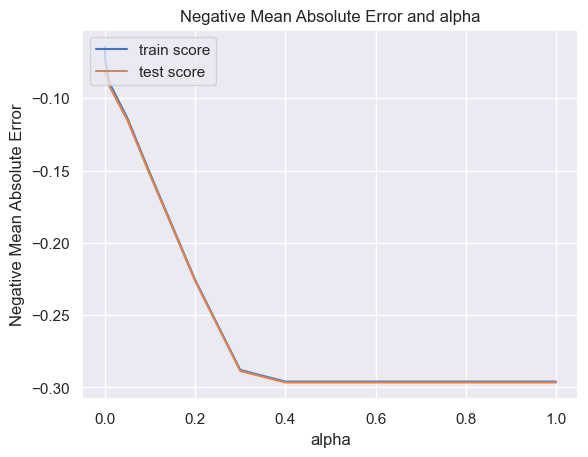

In [203]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### It can be observed that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter; we will choose a low value of alpha to balance the trade-off between Bias-Variance and to get the coefficients of smallest of features.

In [204]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00327705,  0.00825485,  0.01563498,  0.11170268,  0.03883617,
        0.02924451,  0.        ,  0.03354445,  0.        ,  0.047132  ,
        0.        ,  0.        , -0.        ,  0.11832932,  0.00624905,
        0.        ,  0.        ,  0.        , -0.        , -0.00748935,
        0.02108757,  0.03714662,  0.00687927,  0.        ,  0.        ,
        0.        ,  0.00479892,  0.        , -0.07594546,  0.        ,
       -0.        ,  0.0102271 , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.  

In [205]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.995),
 ('MSSubClass', -0.003),
 ('LotFrontage', 0.008),
 ('LotArea', 0.016),
 ('OverallQual', 0.112),
 ('OverallCond', 0.039),
 ('YearRemodAdd', 0.029),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.034),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.047),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.118),
 ('BsmtFullBath', 0.006),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.007),
 ('Fireplaces', 0.021),
 ('GarageArea', 0.037),
 ('WoodDeckSF', 0.007),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.005),
 ('PoolArea', 0.0),
 ('PropAge', -0.076),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.01),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0

In [206]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8857653307871562
0.8975757528754055


In [207]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.12430870550683557


- The RMSE of Ridge model is better than that of Lasso at minimizing the prediction errors and thus is more effective. It is visible that the model performance is better than Lasso.

In [208]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [209]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  11.995
1   MSSubClass  -0.003
2  LotFrontage   0.008
3      LotArea   0.016
4  OverallQual   0.112

In [210]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

Variable   Coeff
0                 constant  11.995
14               GrLivArea   0.118
4              OverallQual   0.112
10             TotalBsmtSF   0.047
5              OverallCond   0.039
..                     ...     ...
85       HouseStyle_2.5Unf  -0.000
211  SaleCondition_Partial   0.000
1               MSSubClass  -0.003
20            KitchenAbvGr  -0.007
29                 PropAge  -0.076

[212 rows x 2 columns]

In [211]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

Variable   Coeff
0       constant  11.995
14     GrLivArea   0.118
4    OverallQual   0.112
10   TotalBsmtSF   0.047
5    OverallCond   0.039
22    GarageArea   0.037
8     BsmtFinSF1   0.034
6   YearRemodAdd   0.029
21    Fireplaces   0.021
3        LotArea   0.016
32   MSZoning_RL   0.010
2    LotFrontage   0.008
23    WoodDeckSF   0.007
15  BsmtFullBath   0.006
27   ScreenPorch   0.005
1     MSSubClass  -0.003
20  KitchenAbvGr  -0.007
29       PropAge  -0.076

In [212]:
# These 16 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice
pred.shape

(18, 2)

In [213]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'GarageArea', 'BsmtFinSF1', 'YearRemodAdd', 'Fireplaces', 'LotArea', 'MSZoning_RL', 'LotFrontage', 'WoodDeckSF', 'BsmtFullBath', 'ScreenPorch', 'MSSubClass', 'KitchenAbvGr', 'PropAge']


In [214]:
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
127   -1.422075    -0.767909     1.287463    -0.876531   -2.226044   
687   -0.830295     0.723176    -0.523315    -1.169786    0.055386   
1315   1.450995    -0.022366    -0.523315    -0.197925    0.511673   
149   -0.283689    -0.767909    -1.428703    -0.333646   -1.085329   
1195  -0.030714    -0.022366    -0.523315    -0.740810   -0.324852   

      BsmtFinSF1  Fireplaces   LotArea  LotFrontage  BsmtFullBath  \
127    -0.749445    0.627637 -0.584255    -0.708617     -0.824529   
687    -0.457086   -0.937542 -0.514223     0.185308     -0.824529   
1315    0.163286    2.192816  0.068885     0.740992     -0.824529   
149    -1.025166   -0.937542 -0.403364    -0.853578     -0.824529   
1195   -1.025166   -0.937542 -0.228627    -0.901898     -0.824529   

      Foundation_PConc  OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
127                  0    -0.708874 -1.019137    -0.266146   -0.760517  
687                  1     0.241020  0.850839    -0.266146   -0.760517  
1315                 0    -0.708874  0.850839    -0.266146    1.520846  
149                  0     1.095923 -1.019137    -0.266146    0.869028  
1195                 1    -0.328916  0.850839    -0.266146    0.054256

In [215]:
X_train_lasso.shape

(1000, 15)

In [216]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
57     0.565584     0.723176    -0.523315    -0.420896    0.459390   
1143  -1.047130    -0.767909    -2.334092    -0.067051   -2.226044   
377    2.250576     1.468719    -0.523315     1.324091    0.673274   
909    0.032530    -0.022366    -0.523315    -0.706880   -0.372382   
866    0.398440     1.468719    -0.523315     1.464660    1.909049   

      BsmtFinSF1  Fireplaces   LotArea  LotFrontage  BsmtFullBath  \
57     -1.025166   -0.937542  0.124559     0.934273     -0.824529   
1143   -0.340618   -0.937542 -0.133786     0.064508     -0.824529   
377    -1.025166    0.627637  0.075527     1.562437     -0.824529   
909    -1.025166    0.627637  0.216762     3.833491     -0.824529   
866    -1.025166    0.627637  0.027960    -0.128774     -0.824529   

      Foundation_PConc  OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
57                   1     0.399335  0.850839    -0.266146   -0.760517  
1143                 0    -0.328916 -1.019137    -0.266146   -0.760517  
377                  1     2.679078  2.720815    -0.266146    0.534971  
909                  1    -0.328916  0.850839    -0.266146   -0.467199  
866                  1     0.557651  0.850839    -0.266146    0.803846

### Observations:
#### Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test, 
#### it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose the predictive variables.
#### It is always advisable to use simple yet robust model.

#### Equation can be formulated using the features and coefficients obtained by Lasso

In [217]:
### Assign the Features as x1, x2.....

pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17']), inplace = True) 
pred

Variable   Coeff
C        constant  11.995
x1      GrLivArea   0.118
x2    OverallQual   0.112
x3    TotalBsmtSF   0.047
x4    OverallCond   0.039
x5     GarageArea   0.037
x6     BsmtFinSF1   0.034
x7   YearRemodAdd   0.029
x8     Fireplaces   0.021
x9        LotArea   0.016
x10   MSZoning_RL   0.010
x11   LotFrontage   0.008
x12    WoodDeckSF   0.007
x13  BsmtFullBath   0.006
x14   ScreenPorch   0.005
x15    MSSubClass  -0.003
x16  KitchenAbvGr  -0.007
x17       PropAge  -0.076

### These are the final features that should be selected for predicting the price of house

### Hence the equation is:    
####    Log(Y) = C + 0.118(x1) + 0.112(x2) +  0.047(x3) + 0.039(x4) + 0.037(x5) + 0.034(x6) + 0.029(x7) +  0.021(x8) + 0.016(x9) + 0.010(x10)  + 0.008(x11) + 0.007(x12) + 0.006(x13) + 0.005(x14) - 0.003(x15) - 0.007(x16) - 0.076(x17)  Error term(RSS + alpha * (sum of absolute value of coefficients)

### INFERENCE


- Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house.

- The higher values of positive coeeficients suggest a high sale price.

- Some of those features are:-
 |  Feature  |  Description  |
 |  ---  |  ---  |
 |  GrLivArea  |  Above grade (ground) living area square feet  |
 |  OverallQual  |  Rates the overall material and finish of the house  |
 |  TotalBsmtSF  |  Total square feet of basement area  |
 |  OverallCond  |  Rates the overall condition of the house  |
 |  GarageArea   |Size of garage in square feet  |
        
- The higher values of negative coeeficients suggest a decrease in sale price.

- Some of those features are:-
   |  Feature  |  Description  |
   |  ---  |  ---  |
   |  PropAge  |  Age of the property at the time of seeling  |
   |  MSSubClass  |  Identifies the type of dwelling involved in the sale  |
   |  KitchenAbvGr  |  Kitchens above grade  |
    

#### When the market value of the property is lower than the Predicted Sale Price, its the time to buy.

